In [2]:
import pandas as pd
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#for path in glob.glob('/content/*'):
  #try:
    #shutil.rmtree(path)
  #except:
    #pass
#os.mkdir('Data')
#os.mkdir('Data1')
#os.mkdir('Data2')
os.mkdir('Combined')

In [ ]:
df_regular = pd.read_csv('/content/Data/Regular.csv')
print(df_regular['Length'])

for path in glob.glob('/content/Data/*.csv'):
  df_temp = pd.read_csv(path, index_col=0)
  df_temp['Length'] = df_regular['Length']
  df_temp.reset_index(drop=True)
  df_temp.to_csv(path, index=False)

df_regular = pd.read_csv('/content/Data1/Regular.csv')
print(df_regular['Length'])

for path in glob.glob('/content/Data1/*.csv'):
  df_temp = pd.read_csv(path, index_col=0)
  df_temp['Length'] = df_regular['Length']
  df_temp.reset_index(drop=True)
  df_temp.to_csv(path, index=False)

df_regular = pd.read_csv('/content/Data2/Regular.csv')
print(df_regular['Length'])

for path in glob.glob('/content/Data2/*.csv'):
  df_temp = pd.read_csv(path, index_col=0)
  df_temp['Length'] = df_regular['Length']
  df_temp.reset_index(drop=True)
  df_temp.to_csv(path, index=False)



0       2
1       2
2       2
3       2
4       3
       ..
155    32
156    31
157    29
158    29
159    33
Name: Length, Length: 160, dtype: int64
0       2
1       2
2       2
3       2
4       2
       ..
795    33
796    23
797    35
798    33
799    33
Name: Length, Length: 800, dtype: int64
0       2
1       2
2       2
3       2
4       2
       ..
795    27
796    41
797    37
798    27
799    31
Name: Length, Length: 800, dtype: int64


In [5]:
file_name_to_csvs = {}
folders = glob.glob('/content/drive/MyDrive/SearchAlgorithms/*')
for folder in folders:
  if "Data" in folder:
    files = glob.glob(folder + '/*.csv')
    for file in files:
      file_name = file.split('/')[-1]
      if file_name in file_name_to_csvs:
        file_name_to_csvs[file_name] = pd.concat([file_name_to_csvs[file_name], pd.read_csv(file, index_col=0)], axis=0)
      else:
        file_name_to_csvs[file_name] = pd.read_csv(file, index_col=0)

for k,v in file_name_to_csvs.items():
  v.reset_index(drop=True)
  v.to_csv('/content/Combined/' + k)
      

Graph for all methods comparing time to solve vs solution length

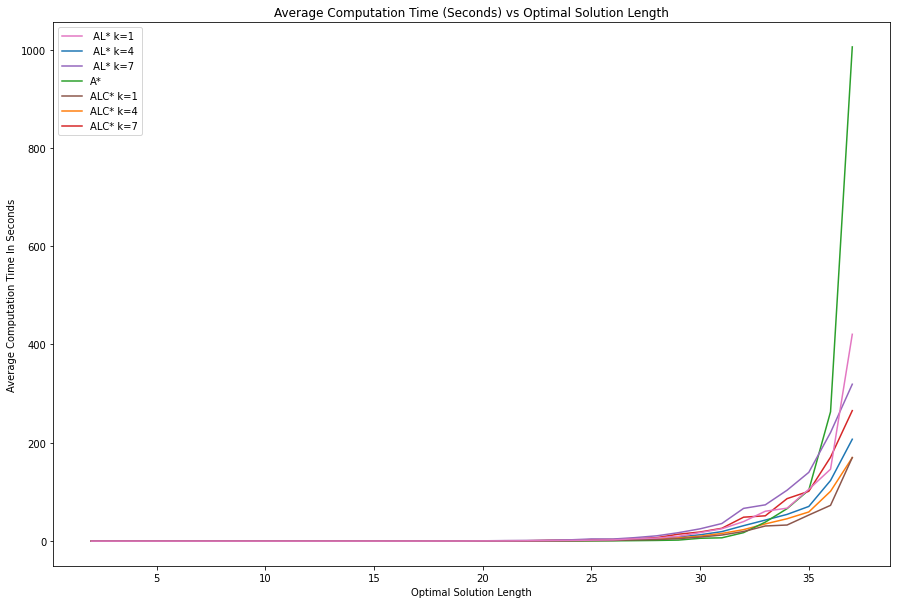

In [12]:
for file in glob.glob('/content/Combined/*.csv'):
  df_temp = pd.read_csv(file, index_col=False)
  lengths = df_temp['Length']
  times = df_temp['Time']

  length_to_times = {}
  for i in range(len(lengths)):
    length = lengths[i]
    if length not in length_to_times:
      length_to_times[length] = []
    length_to_times[length].append(times[i])
  xs = []
  ys = []
  for k in sorted(length_to_times):
    xs.append(k)
    v = length_to_times[k]
    ys.append(sum(v) / len(v))
  
  xs = xs[0:36]
  ys = ys[0:36]
  label = file.split('/')[-1]
  label = label.replace('.csv', "")
  label = label.replace('Lookahead', "")

  if 'New' in label:
    label = label.replace('New', 'ALC*')
  elif 'k=' in label:
    label = label.replace('k=', 'AL* k=')
  else:
    label = label.replace('Regular', 'A*')
  
  if (file[-5].isnumeric()) and (int(file[-5]) in [2, 3, 5, 6]):
    continue

  plt.plot(xs, ys, label=label)
  plt.xlabel('Optimal Solution Length')
  plt.ylabel('Average Computation Time In Seconds')
plt.title("Average Computation Time (Seconds) vs Optimal Solution Length")
plt.rcParams["figure.figsize"] = (15,10)

arr1, arr2 = plt.gca().get_legend_handles_labels()
arr3 = zip(arr1, arr2)
arr3 = sorted(arr3, key=lambda tup: tup[1])
arr1 = [x[0] for x in arr3]
arr2 = [x[1] for x in arr3]
plt.legend(arr1, arr2)

plt.show()


Graph for all Ks for lookahead without looking at closed nodes comparing time to solve vs solution length

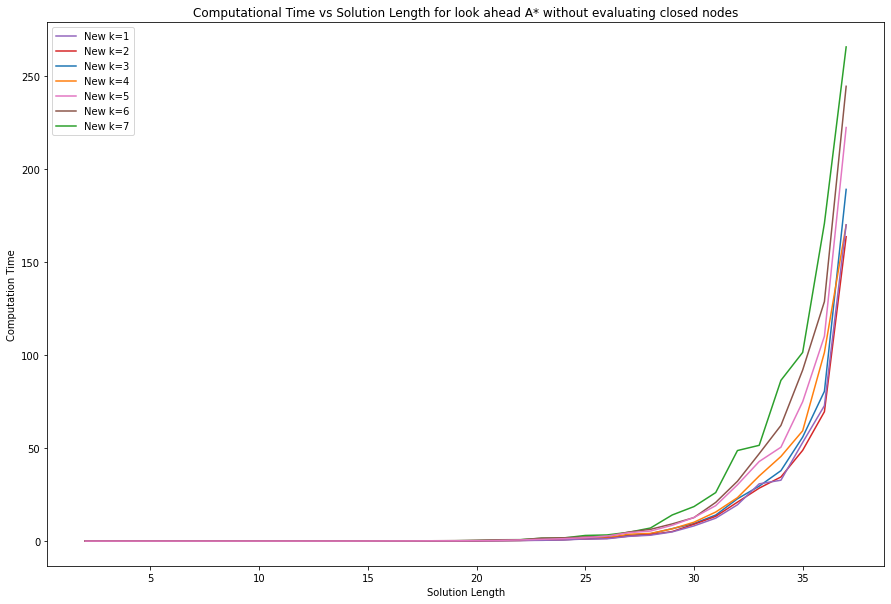

In [ ]:
for file in glob.glob('/content/Combined/*.csv'):
  df_temp = pd.read_csv(file, index_col=False)
  lengths = df_temp['Length']
  times = df_temp['Time']

  length_to_times = {}
  for i in range(len(lengths)):
    length = lengths[i]
    if length not in length_to_times:
      length_to_times[length] = []
    length_to_times[length].append(times[i])
  xs = []
  ys = []
  for k in sorted(length_to_times):
    xs.append(k)
    v = length_to_times[k]
    ys.append(sum(v) / len(v))
  
  xs = xs[0:36]
  ys = ys[0:36]
  if not ("New" in file):
    continue
  label = file.split('/')[-1]
  label = label.replace('.csv', "")
  label = label.replace('Lookahead', "")
  plt.plot(xs, ys, label=label)
  plt.xlabel('Solution Length')
  plt.ylabel('Computation Time')
plt.title("Computational Time vs Solution Length for look ahead A* without evaluating closed nodes")
plt.rcParams["figure.figsize"] = (15,10)

arr1, arr2 = plt.gca().get_legend_handles_labels()
arr3 = zip(arr1, arr2)
arr3 = sorted(arr3, key=lambda tup: tup[1])
arr1 = [x[0] for x in arr3]
arr2 = [x[1] for x in arr3]
plt.legend(arr1, arr2)

plt.show()


Graph for all Ks for lookahead comparing time to solve vs solution length

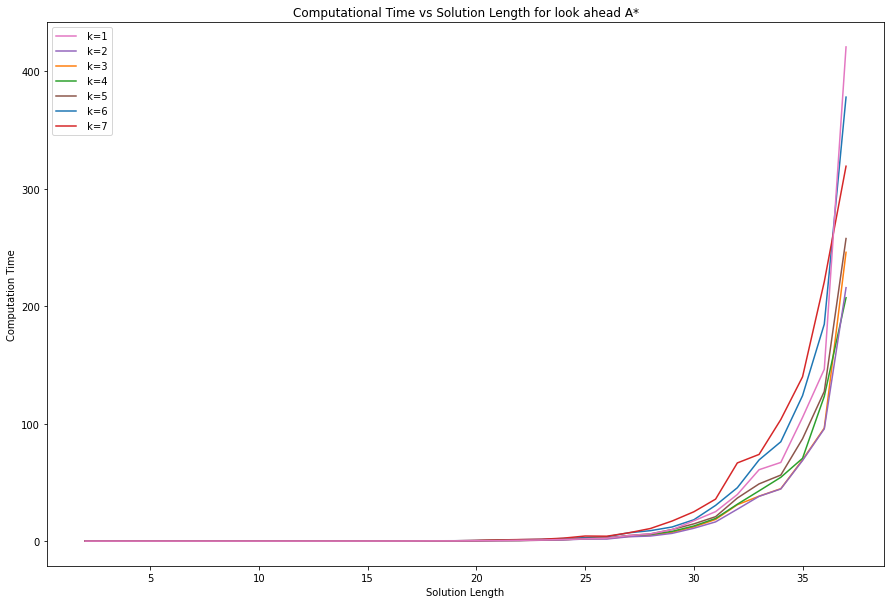

In [ ]:
for file in glob.glob('/content/Combined/*.csv'):
  df_temp = pd.read_csv(file, index_col=False)
  lengths = df_temp['Length']
  times = df_temp['Time']

  length_to_times = {}
  for i in range(len(lengths)):
    length = lengths[i]
    if length not in length_to_times:
      length_to_times[length] = []
    length_to_times[length].append(times[i])
  xs = []
  ys = []
  for k in sorted(length_to_times):
    xs.append(k)
    v = length_to_times[k]
    ys.append(sum(v) / len(v))
  
  xs = xs[0:36]
  ys = ys[0:36]
  if "New" in file or "Regular" in file:
    continue
  label = file.split('/')[-1]
  label = label.replace('.csv', "")
  label = label.replace('Lookahead', "")
  plt.plot(xs, ys, label=label)
  plt.xlabel('Solution Length')
  plt.ylabel('Computation Time')
  #plt.title(file.split('/')[-1])
plt.title("Computational Time vs Solution Length for look ahead A*")
plt.rcParams["figure.figsize"] = (15,10)

arr1, arr2 = plt.gca().get_legend_handles_labels()
arr3 = zip(arr1, arr2)
arr3 = sorted(arr3, key=lambda tup: tup[1])
arr1 = [x[0] for x in arr3]
arr2 = [x[1] for x in arr3]
plt.legend(arr1, arr2)

plt.show()


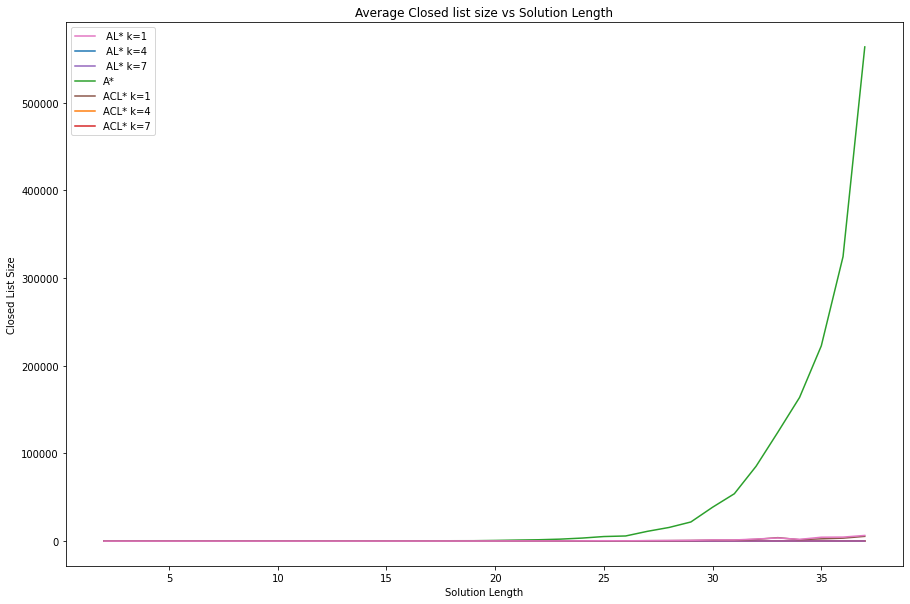

In [ ]:
for file in glob.glob('/content/Combined/*.csv'):
  df_temp = pd.read_csv(file, index_col=False)
  lengths = df_temp['Length']
  expanded = df_temp['Expanded A*']

  length_to_expanded = {}
  for i in range(len(lengths)):
    length = lengths[i]
    if length not in length_to_expanded:
      length_to_expanded[length] = []
    length_to_expanded[length].append(expanded[i])
  xs = []
  ys = []
  for k in sorted(length_to_expanded):
    xs.append(k)
    v = length_to_expanded[k]
    ys.append(sum(v) / len(v))
  
  xs = xs[0:36]
  ys = ys[0:36]
  #if not ("New" in file):
    #continue
  label = file.split('/')[-1]
  label = label.replace('.csv', "")
  label = label.replace('Lookahead', "")

  if 'New' in label:
    label = label.replace('New', 'ALC*')
  elif 'k=' in label:
    label = label.replace('k=', 'AL* k=')
  else:
    label = label.replace('Regular', 'A*')
  
  if (file[-5].isnumeric()) and (int(file[-5]) in [2, 3, 5, 6]):
    continue

  plt.plot(xs, ys, label=label)
  plt.xlabel('Solution Length')
  plt.ylabel('Closed List Size')
  #plt.title(file.split('/')[-1])
plt.title("Average Closed list size vs Solution Length")
plt.rcParams["figure.figsize"] = (15,10)

arr1, arr2 = plt.gca().get_legend_handles_labels()
arr3 = zip(arr1, arr2)
arr3 = sorted(arr3, key=lambda tup: tup[1])
arr1 = [x[0] for x in arr3]
arr2 = [x[1] for x in arr3]
plt.legend(arr1, arr2)

plt.show()


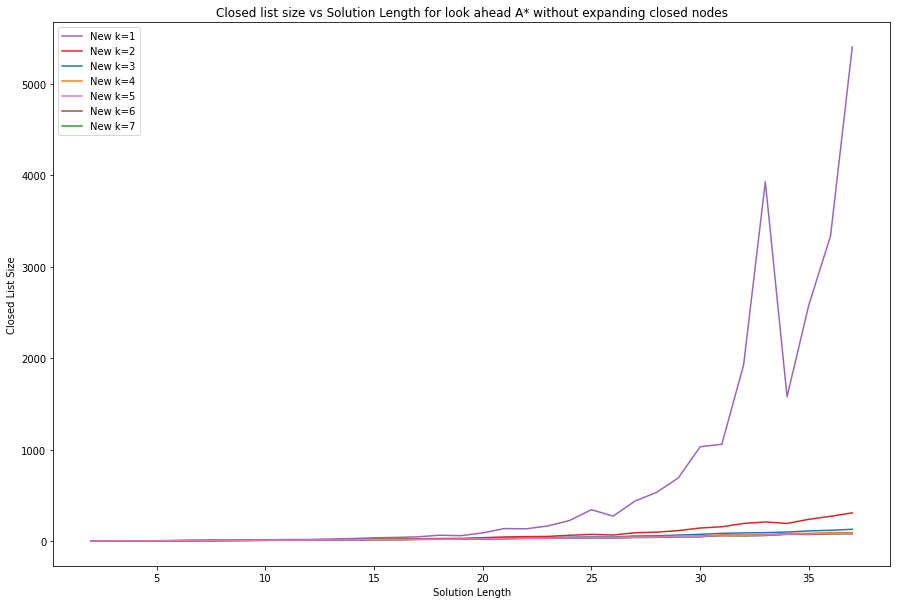

In [ ]:
for file in glob.glob('/content/Combined/*.csv'):
  df_temp = pd.read_csv(file, index_col=False)
  lengths = df_temp['Length']
  expanded = df_temp['Expanded A*']

  length_to_expanded = {}
  for i in range(len(lengths)):
    length = lengths[i]
    if length not in length_to_expanded:
      length_to_expanded[length] = []
    length_to_expanded[length].append(expanded[i])
  xs = []
  ys = []
  for k in sorted(length_to_expanded):
    xs.append(k)
    v = length_to_expanded[k]
    ys.append(sum(v) / len(v))
  
  xs = xs[0:36]
  ys = ys[0:36]
  if not ("New" in file):
    continue
  label = file.split('/')[-1]
  label = label.replace('.csv', "")
  label = label.replace('Lookahead', "")
  plt.plot(xs, ys, label=label)
  plt.xlabel('Solution Length')
  plt.ylabel('Closed List Size')
  #plt.title(file.split('/')[-1])
plt.title("Closed list size vs Solution Length for look ahead A* without expanding closed nodes")
plt.rcParams["figure.figsize"] = (15,10)

arr1, arr2 = plt.gca().get_legend_handles_labels()
arr3 = zip(arr1, arr2)
arr3 = sorted(arr3, key=lambda tup: tup[1])
arr1 = [x[0] for x in arr3]
arr2 = [x[1] for x in arr3]
plt.legend(arr1, arr2)

plt.show()


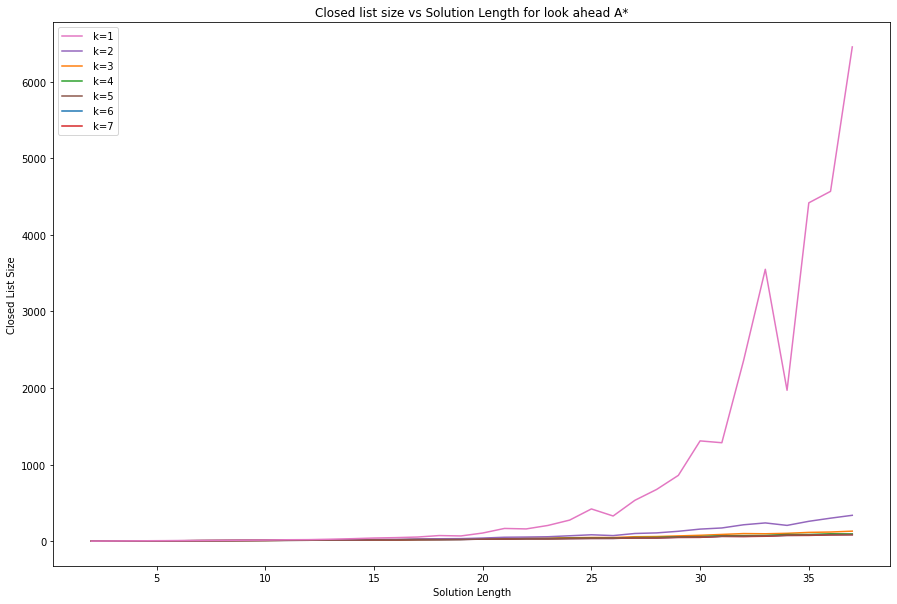

In [ ]:
for file in glob.glob('/content/Combined/*.csv'):
  df_temp = pd.read_csv(file, index_col=False)
  lengths = df_temp['Length']
  expanded = df_temp['Expanded A*']

  length_to_expanded = {}
  for i in range(len(lengths)):
    length = lengths[i]
    if length not in length_to_expanded:
      length_to_expanded[length] = []
    length_to_expanded[length].append(expanded[i])
  xs = []
  ys = []
  for k in sorted(length_to_expanded):
    xs.append(k)
    v = length_to_expanded[k]
    ys.append(sum(v) / len(v))
  
  xs = xs[0:36]
  ys = ys[0:36]
  if "New" in file or "Regular" in file:
    continue
  label = file.split('/')[-1]
  label = label.replace('.csv', "")
  label = label.replace('Lookahead', "")
  plt.plot(xs, ys, label=label)
  plt.xlabel('Solution Length')
  plt.ylabel('Closed List Size')
  #plt.title(file.split('/')[-1])
plt.title("Closed list size vs Solution Length for look ahead A*")
plt.rcParams["figure.figsize"] = (15,10)

arr1, arr2 = plt.gca().get_legend_handles_labels()
arr3 = zip(arr1, arr2)
arr3 = sorted(arr3, key=lambda tup: tup[1])
arr1 = [x[0] for x in arr3]
arr2 = [x[1] for x in arr3]
plt.legend(arr1, arr2)

plt.show()


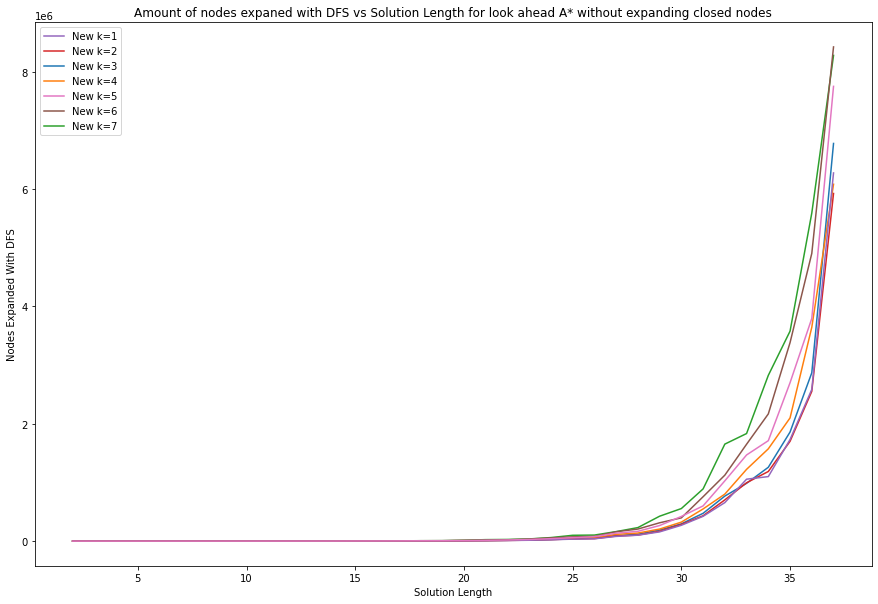

In [ ]:
for file in glob.glob('/content/Combined/*.csv'):
  df_temp = pd.read_csv(file, index_col=False)
  lengths = df_temp['Length']
  expanded = df_temp['Expanded DFS']

  length_to_expanded = {}
  for i in range(len(lengths)):
    length = lengths[i]
    if length not in length_to_expanded:
      length_to_expanded[length] = []
    length_to_expanded[length].append(expanded[i])
  xs = []
  ys = []
  for k in sorted(length_to_expanded):
    xs.append(k)
    v = length_to_expanded[k]
    ys.append(sum(v) / len(v))
  
  xs = xs[0:36]
  ys = ys[0:36]
  if not ("New" in file):
    continue
  label = file.split('/')[-1]
  label = label.replace('.csv', "")
  label = label.replace('Lookahead', "")
  plt.plot(xs, ys, label=label)
  plt.xlabel('Solution Length')
  plt.ylabel('Nodes Expanded With DFS')
  #plt.title(file.split('/')[-1])
plt.title("Amount of nodes expaned with DFS vs Solution Length for look ahead A* without expanding closed nodes")
plt.rcParams["figure.figsize"] = (15,10)

arr1, arr2 = plt.gca().get_legend_handles_labels()
arr3 = zip(arr1, arr2)
arr3 = sorted(arr3, key=lambda tup: tup[1])
arr1 = [x[0] for x in arr3]
arr2 = [x[1] for x in arr3]
plt.legend(arr1, arr2)

plt.show()


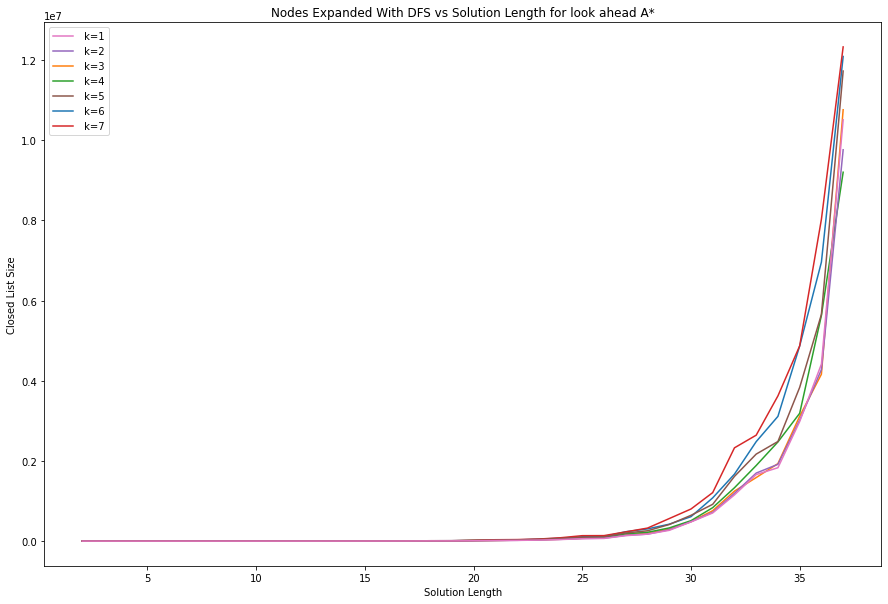

In [ ]:
for file in glob.glob('/content/Combined/*.csv'):
  df_temp = pd.read_csv(file, index_col=False)
  lengths = df_temp['Length']
  expanded = df_temp['Expanded DFS']

  length_to_expanded = {}
  for i in range(len(lengths)):
    length = lengths[i]
    if length not in length_to_expanded:
      length_to_expanded[length] = []
    length_to_expanded[length].append(expanded[i])
  xs = []
  ys = []
  for k in sorted(length_to_expanded):
    xs.append(k)
    v = length_to_expanded[k]
    ys.append(sum(v) / len(v))
  
  xs = xs[0:36]
  ys = ys[0:36]
  if "New" in file or "Regular" in file:
    continue
  label = file.split('/')[-1]
  label = label.replace('.csv', "")
  label = label.replace('Lookahead', "")
  plt.plot(xs, ys, label=label)
  plt.xlabel('Solution Length')
  plt.ylabel('Closed List Size')
  #plt.title(file.split('/')[-1])
plt.title("Nodes Expanded With DFS vs Solution Length for look ahead A*")
plt.rcParams["figure.figsize"] = (15,10)

arr1, arr2 = plt.gca().get_legend_handles_labels()
arr3 = zip(arr1, arr2)
arr3 = sorted(arr3, key=lambda tup: tup[1])
arr1 = [x[0] for x in arr3]
arr2 = [x[1] for x in arr3]
plt.legend(arr1, arr2)

plt.show()


Graph comparing Solution time to K for both lookahead methods

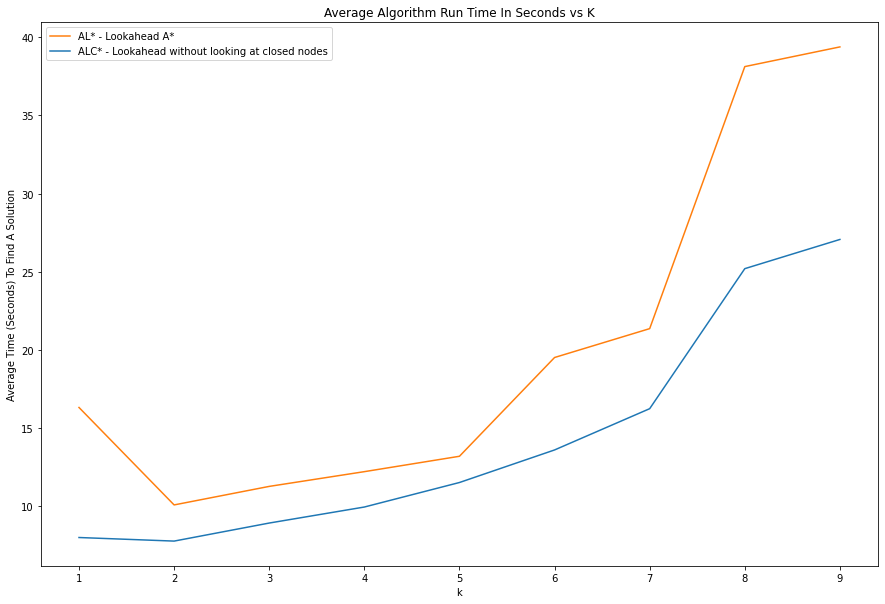

In [10]:
#new
xs = []
ys = []
for file in glob.glob('/content/Combined/*.csv'):
  if not ("LookaheadNew" in file):
    continue
  k = int(file[-5])
  df_temp = pd.read_csv(file, index_col=False)
  times = df_temp['Time']

  xs.append(k)
  ys.append(sum(times) / len(times))
  

tuples = zip(xs, ys)
tuples = sorted(tuples, key=lambda tup: tup[0])
xs = [x[0] for x in tuples]
ys = [x[1] for x in tuples]

plt.plot(xs, ys, label="ALC* - Lookahead without looking at closed nodes")
plt.xlabel('k')
plt.ylabel('Average Solution Time')

#original
xs = []
ys = []
for file in glob.glob('/content/Combined/*.csv'):
  if not ("Lookahead " in file):
    continue
  k = int(file[-5])
  df_temp = pd.read_csv(file, index_col=False)
  times = df_temp['Time']

  xs.append(k)
  ys.append(sum(times) / len(times))
  

tuples = zip(xs, ys)
tuples = sorted(tuples, key=lambda tup: tup[0])
xs = [x[0] for x in tuples]
ys = [x[1] for x in tuples]

plt.plot(xs, ys, label="AL* - Lookahead A*")
plt.xlabel('k')
plt.ylabel('Average Time (Seconds) To Find A Solution')


plt.title("Average Algorithm Run Time In Seconds vs K")
plt.rcParams["figure.figsize"] = (15,10)

arr1, arr2 = plt.gca().get_legend_handles_labels()
arr3 = zip(arr1, arr2)
arr3 = sorted(arr3, key=lambda tup: tup[1])
arr1 = [x[0] for x in arr3]
arr2 = [x[1] for x in arr3]
plt.legend(arr1, arr2)

plt.show()


Graph comparing Closed nodes to K for both lookahead methods

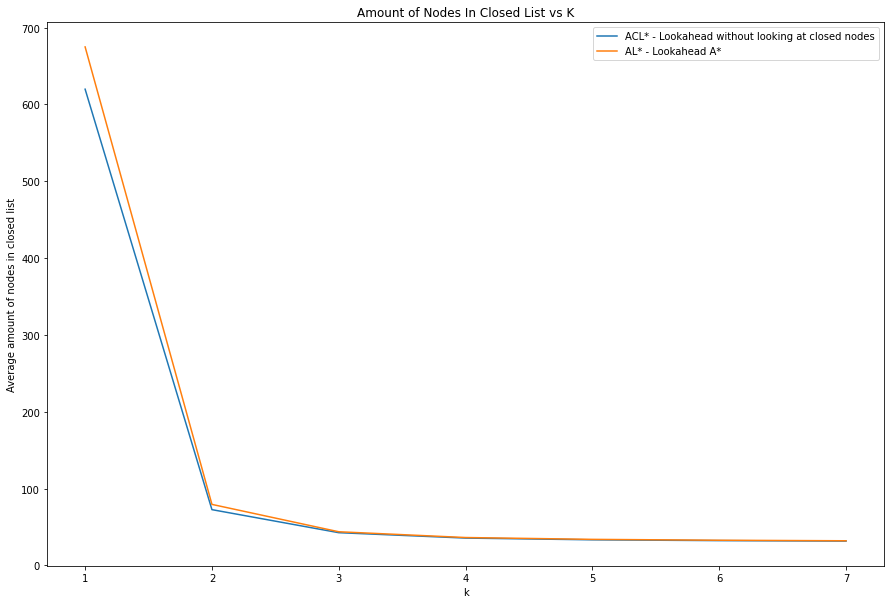

In [ ]:
#new
xs = []
ys = []
for file in glob.glob('/content/Combined/*.csv'):
  if not ("LookaheadNew" in file):
    continue
  k = int(file[-5])
  df_temp = pd.read_csv(file, index_col=False)
  expanded = df_temp['Expanded A*']

  xs.append(k)
  ys.append(sum(expanded) / len(expanded))
  

tuples = zip(xs, ys)
tuples = sorted(tuples, key=lambda tup: tup[0])
xs = [x[0] for x in tuples]
ys = [x[1] for x in tuples]

plt.plot(xs, ys, label="ALC* - Lookahead without looking at closed nodes")

#original
xs = []
ys = []
for file in glob.glob('/content/Combined/*.csv'):
  if not ("Lookahead " in file):
    continue
  k = int(file[-5])
  df_temp = pd.read_csv(file, index_col=False)
  expanded = df_temp['Expanded A*']

  xs.append(k)
  ys.append(sum(expanded) / len(expanded))
  

tuples = zip(xs, ys)
tuples = sorted(tuples, key=lambda tup: tup[0])
xs = [x[0] for x in tuples]
ys = [x[1] for x in tuples]

plt.plot(xs, ys, label="AL* - Lookahead A*")
plt.xlabel('k')
plt.ylabel('Average amount of nodes in closed list')


plt.title("Amount of Nodes In Closed List vs K")
plt.rcParams["figure.figsize"] = (15,10)

arr1, arr2 = plt.gca().get_legend_handles_labels()
arr3 = zip(arr1, arr2)
arr3 = sorted(arr3, key=lambda tup: tup[1])
arr1 = [x[0] for x in arr3]
arr2 = [x[1] for x in arr3]
plt.legend(arr1, arr2)

plt.show()


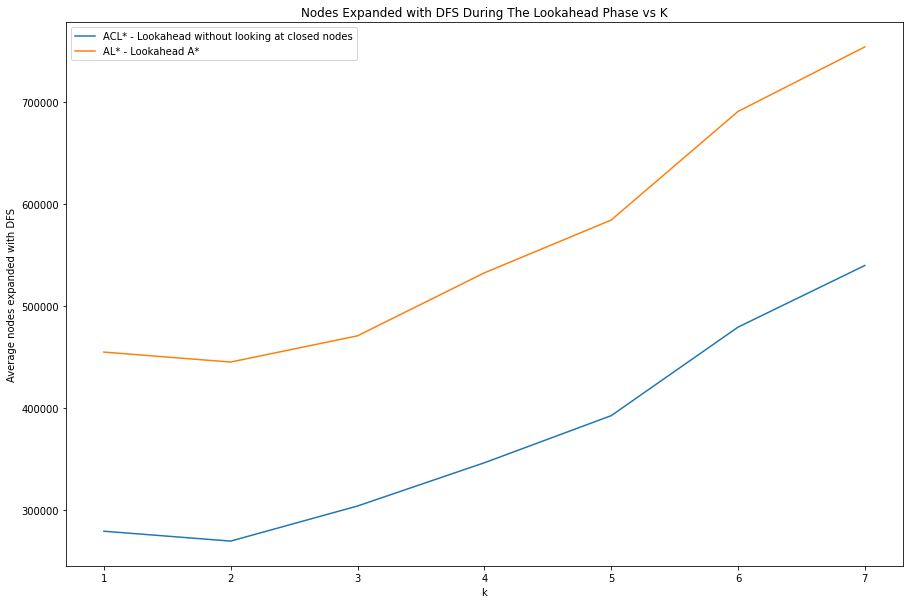

In [ ]:
#new
xs = []
ys = []
for file in glob.glob('/content/Combined/*.csv'):
  if not ("LookaheadNew" in file):
    continue
  k = int(file[-5])
  df_temp = pd.read_csv(file, index_col=False)
  expanded = df_temp['Expanded DFS']

  xs.append(k)
  ys.append(sum(expanded) / len(expanded))
  

tuples = zip(xs, ys)
tuples = sorted(tuples, key=lambda tup: tup[0])
xs = [x[0] for x in tuples]
ys = [x[1] for x in tuples]

plt.plot(xs, ys, label="ALC* - Lookahead without looking at closed nodes")

#original
xs = []
ys = []
for file in glob.glob('/content/Combined/*.csv'):
  if not ("Lookahead " in file):
    continue
  k = int(file[-5])
  df_temp = pd.read_csv(file, index_col=False)
  expanded = df_temp['Expanded DFS']

  xs.append(k)
  ys.append(sum(expanded) / len(expanded))
  

tuples = zip(xs, ys)
tuples = sorted(tuples, key=lambda tup: tup[0])
xs = [x[0] for x in tuples]
ys = [x[1] for x in tuples]

plt.plot(xs, ys, label="AL* - Lookahead A*")
plt.xlabel('k')
plt.ylabel('Average nodes expanded with DFS')


plt.title("Nodes Expanded with DFS During The Lookahead Phase vs K")
plt.rcParams["figure.figsize"] = (15,10)

arr1, arr2 = plt.gca().get_legend_handles_labels()
arr3 = zip(arr1, arr2)
arr3 = sorted(arr3, key=lambda tup: tup[1])
arr1 = [x[0] for x in arr3]
arr2 = [x[1] for x in arr3]
plt.legend(arr1, arr2)

plt.show()
